In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

%matplotlib widget

2023-02-23 16:17:12.682973: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-02-23 16:17:12.682987: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
tensor_in = tf.random.uniform([16,16,3])

interpolation_modes = (["area", "bicubic", "bilinear", "gaussian", "lanczos3", "lanczos5", "mitchellcubic", "nearest"])


2023-02-23 16:17:14.892338: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-23 16:17:14.892537: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-02-23 16:17:14.892589: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory
2023-02-23 16:17:14.892638: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory
2023-02-23 16:17:14.892685: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Co

In [3]:
def do_upsample_test(tensor_in, interpolation):
	model = tf.keras.Sequential([
		tf.keras.layers.UpSampling2D(size=4, interpolation=interpolation)
	])
	
	return tf.squeeze(model(tf.expand_dims(tensor_in, 0)))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


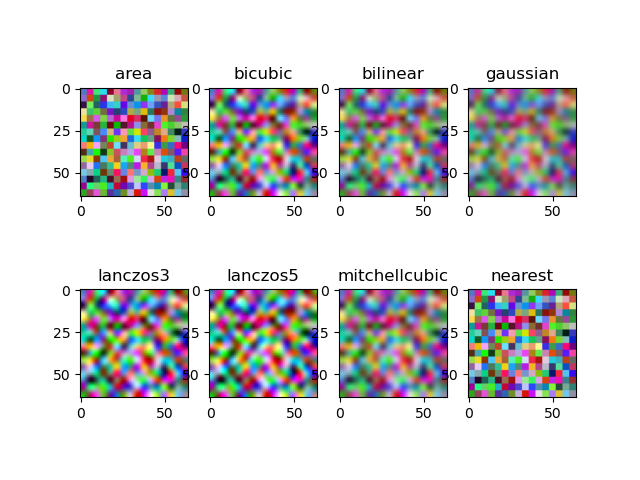

In [4]:
i = 0
for interpolation in interpolation_modes:
	plt.subplot(2, len(interpolation_modes) // 2, i+1)
	plt.title(interpolation)
	result = do_upsample_test(tensor_in, interpolation=interpolation)
	
	plt.imshow(result)
	i += 1